In [7]:
import numpy as np
from matplotlib import pyplot as plt

# Load the residual

In [2]:
residual = np.load("GLASS_PSD_fixed.npz")

In [3]:
list(residual.keys())

['f',
 'DATA_A',
 'DATA_E',
 'DATA_T',
 'NOISEMODEL_A',
 'NOISEMODEL_E',
 'NOISEMODEL_T',
 'PSDMODEL_A',
 'PSDMODEL_E',
 'PSDMODEL_T']

In [4]:
f = residual['f']
A = residual['DATA_A']
E = residual['DATA_E']
T = residual['DATA_T']
psdA = residual['PSDMODEL_A']
psdE = residual['PSDMODEL_E']
psdT = residual['PSDMODEL_T']

In [5]:
A

array([8.14661854e-36, 4.34446262e-36, 1.76535873e-36, ...,
       2.88239376e-40, 6.40885105e-40, 4.04325257e-40], shape=(3144959,))

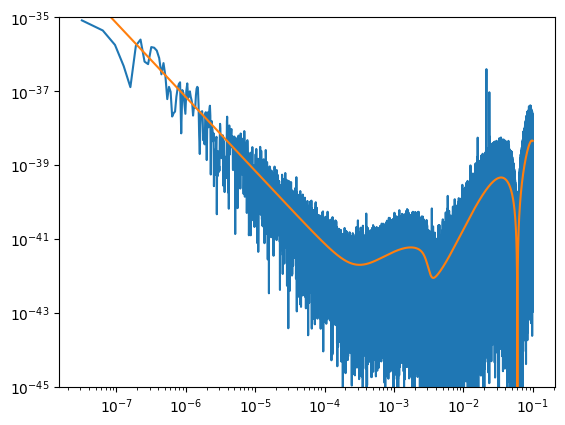

In [7]:
plt.loglog(f,A)
plt.loglog(f,psdA)
plt.ylim([1e-45,1e-35])
plt.show()

# generate and inject mbhb

In [8]:
from bbhx.waveformbuild import BBHWaveformFD
from lisatools.utils.constants import *

In [11]:
m1 = 2e6
m2 = 7e5
chi1 = 0.5
chi2 = 0.7
dist = 15 * 1e9 * PC_SI
phi_ref = 0.6
f_ref = 0.0
inc = np.pi / 8
lam = 3.4
beta = -0.7
psi = np.pi/4
t_ref = 1e6 # seconds

length=1024

# setup data holders
Tobs = YRSID_SI / 12.  # 1 month
dt = 10.0  # sec
N = int(Tobs / dt)
Tobs = N * dt

freqs = np.fft.rfftfreq(N, dt)

tdi_wave_gen = BBHWaveformFD()
AET = tdi_wave_gen(
    m1,
    m2, 
    chi1,
    chi2,
    dist, 
    phi_ref,
    f_ref, 
    inc,
    lam,
    beta,
    psi,
    t_ref,
    length=1024, 
    combine=False,  # TODO: check this
    direct=False,
    fill=True,
    squeeze=True,
    freqs=freqs
)

In [12]:
AET

array([[[ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          1.90265685e-33-1.30391344e-32j,
         -1.02793824e-32+8.23723689e-33j,
          1.31311998e-32+9.83920041e-34j],
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          1.47456265e-33+3.68743417e-33j,
          1.43512813e-33-3.70130518e-33j,
         -3.57214989e-33+1.72822300e-33j],
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          1.34557209e-32-2.65640487e-33j,
         -1.16500341e-32-7.22974751e-33j,
          3.59068039e-33+1.32279730e-32j]]], shape=(1, 3, 131493))